In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import get_fin_data as gfd
from pairs_methods import distance_approach as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest 
import data_base as db
import os

In [34]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732212
2021-01-05    14.268964
2021-01-06    14.297462
2021-01-07    14.724961
2021-01-08    14.781960
Name: Adj Close, dtype: float64


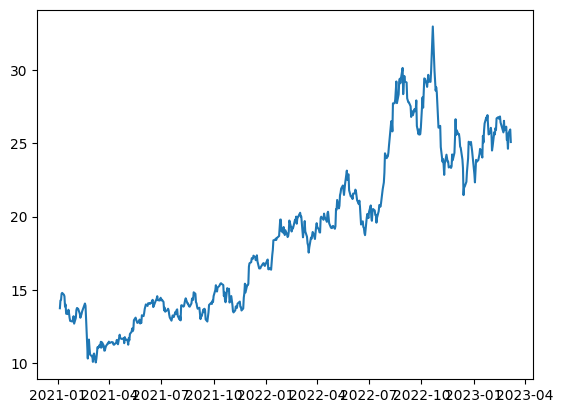

In [35]:
fig, ax = plt.subplots()
ax.plot(petr.index, petr)
plt.show()

In [36]:
# create random series to simulate and test functions

x = np.random.randn(375)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(375)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)

print(x.head())
print(y.head())

0    4.942038
1    4.926750
2    4.999462
3    4.862433
4    4.901284
dtype: float64
0    5.955453
1    6.039960
2    6.144376
3    6.115547
4    6.146265
dtype: float64


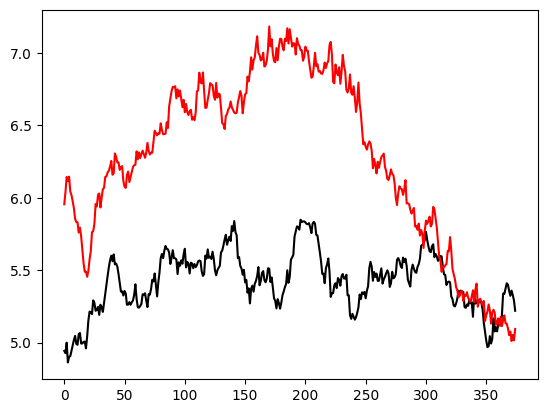

In [37]:
### plot series
fig, ax = plt.subplots()
ax.plot(x.index, x, color="black")
ax.plot(y.index, y, color="red")
plt.show()

In [47]:
x_train, x_test = backtest.split_train_test(x, 0.7)
y_train, y_test = backtest.split_train_test(y, 0.7)

print(x_train, x_test)
print(y_train, y_test)

0      4.942038
1      4.926750
2      4.999462
3      4.862433
4      4.901284
         ...   
258    5.453569
259    5.476609
260    5.426045
261    5.427197
262    5.471642
Length: 263, dtype: float64 262    5.471642
263    5.512905
264    5.407301
265    5.436819
266    5.454687
         ...   
370    5.323032
371    5.359060
372    5.328804
373    5.290441
374    5.219521
Length: 113, dtype: float64
0      5.955453
1      6.039960
2      6.144376
3      6.115547
4      6.146265
         ...   
258    6.226413
259    6.168576
260    6.248990
261    6.206989
262    6.247653
Length: 263, dtype: float64 262    6.247653
263    6.281413
264    6.293019
265    6.305690
266    6.213908
         ...   
370    5.076002
371    5.010924
372    5.053162
373    5.015593
374    5.094047
Length: 113, dtype: float64


In [50]:
x_train_norm = dist.normalize_train(x_train)
y_train_norm = dist.normalize_train(y_train)

x_test_norm = dist.normalize_test(x_train, x_test)
y_test_norm = dist.normalize_test(y_train, y_test)

spread_train = dist.spread_distance(x_train_norm, y_train_norm)
spread_test = dist.spread_distance(x_test, y_test)

print(spread_train, spread_test)

0     -0.209084
1     -0.273451
2     -0.260108
3     -0.382372
4     -0.360743
         ...   
258    0.152878
259    0.209683
260    0.111916
261    0.137371
262    0.158920
Length: 263, dtype: float64 262   -0.776011
263   -0.768508
264   -0.885718
265   -0.868871
266   -0.759221
         ...   
370    0.247030
371    0.348136
372    0.275642
373    0.274848
374    0.125474
Length: 113, dtype: float64


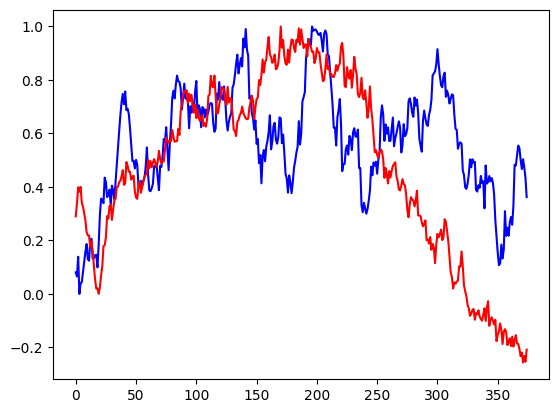

In [63]:
x_train_test_norm = pd.concat([x_train_norm, x_test_norm], axis=0)
y_train_test_norm = pd.concat([y_train_norm, y_test_norm], axis=0)

fig, ax = plt.subplots()
ax.plot(x_train_test_norm, color="blue")
ax.plot(y_train_test_norm, color="red")
plt.show()

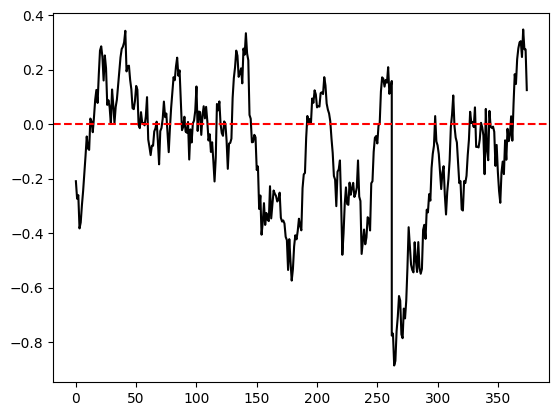

In [65]:
spread_train_test = pd.concat([spread_train, spread_test], axis=0)

fig, ax = plt.subplots()
ax.plot(spread_train_test, color="black")
ax.axhline(0, color="red", linestyle="dashed")
plt.show()